# Step-by-step guide to implement Transformer model for NLP tasks, using TensorFlow

In this tutorial, I'll walk through the steps to implement the Transformer model from ["Attention is All You Need"](https://arxiv.org/abs/1706.03762) paper for the machine translation task. The model is based on the Transformer (self-attention) architecture, an alternative to recurrent neural networks (RNNs). The Transformer model is more straightforward than traditional recurrent neural networks and has achieved state-of-the-art results on machine translation tasks.

<b>Table of content:</b>
- Introduction to Transformer Architecture
- Implementing positional embedding layer
- Implementing Attention layers
- Implementing Encoder and Decoder layers
- Building the Transformer model
- Preprocessing data for machine translation task
- Training and Evaluating the model
- Run inference on new data with a trained model

## 1. Introduction to Transformer architecture
### 1.1. CNNs and RNNs vs Transformers

If you were following my blog, you probably know I recently was focused on CNNs and RNNs, but I haven't covered Transformers yet. So, what is the difference between Transformers and RNNs?

1. **Convolutional Neural Networks (CNNs)** are primarily used for image and video-related tasks. They excel at capturing spatial relationships and extracting features from input data. CNNs consist of convolutional layers, pooling layers, and fully connected layers. Convolutional layers use filters to scan and convolve the input data, capturing local patterns and features. Pooling layers reduce the spatial dimensions of the data, retaining the most essential information. Fully connected layers provide the final classification or regression outputs.

2. **Recurrent Neural Networks (RNNs)** are designed for sequential data, such as text or time series. They process input data sequentially, maintaining hidden states that retain information from previous inputs. RNNs have a "memory" of previous inputs, making them suitable for tasks where the context matters, such as natural language processing (NLP), speech recognition, and machine translation. However, RNNs suffer from vanishing or exploding gradient problems, limiting their ability to capture long-term dependencies.

3. **Transformers** are a relatively new architecture that gained significant popularity, especially in the field of NLP. Vaswani et al. introduced them in the paper "Attention Is All You Need" in 2017. Transformers rely on self-attention mechanisms to capture global dependencies between input elements. They can process inputs in parallel, making them highly parallelizable and efficient for training on modern hardware. Transformers have achieved state-of-the-art results in various NLP tasks, including language translation, text summarization, and sentiment analysis.

Compared to CNNs and RNNs, Transformers have several advantages:

**a. Parallelization:** Transformers can process input elements in parallel, making them faster to train and more efficient on hardware that supports parallel operations;

**b. Attention mechanism:** Transformers use self-attention to capture global dependencies in the input sequence, allowing them to attend to relevant context across the entire sequence. This is particularly useful in NLP tasks where long-range dependencies are essential.

**c. No sequential processing:** Unlike RNNs, Transformers do not process input sequentially. They can take advantage of parallel processing and are not limited by the sequential nature of RNNs, enabling faster training and inference.

However, Transformers also have some limitations. They typically require large amounts of data to train effectively and can be computationally expensive, especially for longer sequences. Additionally, CNNs and RNNs still perform well for specific tasks, especially when the input data has a grid-like structure (CNNs) or requires sequential processing (RNNs).

In summary, while CNNs and RNNs have their strengths in image and sequential data, respectively, Transformers have emerged as powerful models for NLP tasks, leveraging parallel processing and attention mechanisms to capture global dependencies. The choice of architecture depends on the specific task and characteristics of the input data.


### 1.2 Main components of Transformer architecture

Here is the architecture of the Transformer model with short descriptions of each component:

<center><img src="https://lena-voita.github.io/resources/lectures/seq2seq/transformer/model-min.png" width="1000" height="530"/></center>

The **Transformer** architecture is made up of two main parts: the **encoder** and the **decoder**. These parts have multiple layers that use **attention** and **self-attention** mechanisms to process input and output sequences. The **encoder** converts the input sequence into a hidden representation, while the **decoder** generates the output sequence based on the encoder's hidden representation. The **Transformer** achieves excellent performance on various language processing tasks by combining these components.

- In more detail, the **encoder** takes the input sequence and converts it into a series of embeddings. These embeddings are then processed through a stack of identical layers in the encoder. Each layer consists of two sublayers: a **self-attention** layer and a **feedforward** layer. The self-attention layer allows the encoder to focus on different parts of the input sequence and capture long-range connections, while the feedforward layer applies a nonlinear transformation to the hidden representation.

- Similarly, the **decoder** also has a stack of identical layers. However, each layer in the decoder has three sublayers: a **self-attention** layer, an **encoder-decoder attention** layer, and a **feedforward** layer. The self-attention layer helps the decoder attend to different parts of the output sequence, while the encoder-decoder attention layer enables the decoder to consider different parts of the input sequence.

- **Attention** is a mechanism that allows the model to selectively concentrate on specific aspects of the input when making predictions. In the Transformer architecture, attention is used in both the encoder and decoder. It calculates a weighted sum of the input sequence values, where the weights are determined by the similarity between the query and the keys. This mechanism allows the model to focus on different parts of the input sequence based on the specific task.

- The **self-attention** mechanism is a specific type of attention used in the Transformer architecture. It operates on the input sequence and transforms it into query, key, and value vectors. The query vectors determine the attention weights for each position in the input sequence, based on their similarity to the key vectors. The value vectors are then multiplied by the attention weights and summed up to create a weighted representation of the input sequence. This representation becomes the input for the next layer, enabling the model to attend to different parts of the sequence and capture long-range dependencies.

To account for the lack of a recurrence or convolutional structure in the Transformer, **positional encoding** is applied. It encodes the position of tokens in the input sequence. Each token's embedding is augmented with positional encoding to provide the model with positional information. The positional encoding is calculated using a fixed function that considers the token's position in the sequence and the embedding's dimension. By incorporating this positional information, the model can differentiate between tokens appearing at different positions in the input sequence.

In official TensorFlow transformer tutorial, we can find this great visualization of how Encoder and Decoder work while processing input data:

<center><img src="https://www.tensorflow.org/images/tutorials/transformer/apply_the_transformer_to_machine_translation.gif"/></center>






https://machinelearningmastery.com/a-gentle-introduction-to-positional-encoding-in-transformer-models-part-1/

## 2. Implementing PositionalEmbedding layers

### 2.1. Positional encoding (positional_encoding function)

In Transformer models, both the encoder and decoder components employ a common approach to convert input tokens into vectors:

<center><img src="https://www.tensorflow.org/images/tutorials/transformer/PositionalEmbedding.png"/></center>

This is achieved using a tf.keras.layers.Embedding layer, which generates a vector representation for each token in the input sequence.

One challenge in these models is that the attention layers do not inherently capture the order of tokens in the input sequence, as they lack recurrent or convolutional layers. Consequently, the model perceives the input as a "bag of words," where the token order is disregarded. For instance, the sequences "how are you," "how you are," and "you how are" would all be considered identical by the model.

To address this issue, Transformers utilize a technique called "Positional Encoding." It enables the model to understand the position or location of each entity within the sequence by assigning a unique representation to each position. Unlike using a single number, such as an index value, to represent the position, which can lead to problems with large magnitudes or normalization discrepancies, Transformers employ a smart positional encoding scheme. In this scheme, each position or index is mapped to a vector. Consequently, the output of the positional encoding layer is a matrix, where each row represents an encoded object of the sequence combined with its positional information. This allows the model to maintain the sequential order of the input tokens and gain a better understanding of the sentence's meaning.

The formula for calculating the positional encoding is as follows:

$$\Large{PE_{(pos, 2i)} = \sin(pos / 10000^{2i / d_{model}})} $$
$$\Large{PE_{(pos, 2i+1)} = \cos(pos / 10000^{2i / d_{model}})} $$

where $pos$ is the position and $i$ is the dimension. $d_{model}$ is the dimension of the embedding vector. In other words, each dimension of the positional encoding corresponds to a sinusoid. The wavelength of each sinusoid is determined by the position, and the frequency is determined by the dimension. The positional encoding is calculated using sine and cosine functions with different frequencies. The frequencies form a geometric progression from $2\pi$ to $10000 \cdot 2\pi$.

Let's implement this layer in code:

In [1]:
import numpy as np
import tensorflow as tf

for gpu in tf.config.experimental.list_physical_devices('GPU'):
    tf.config.experimental.set_memory_growth(gpu, True)

def positional_encoding(length: int, depth: int):
    """
    Generates a positional encoding for a given length and depth.

    Args:
        length (int): The length of the input sequence.
        depth (int): The depth that represents the dimensionality of the encoding.

    Returns:
        tf.Tensor: The positional encoding of shape (length, depth).
    """
    depth = depth / 2

    positions = np.arange(length)[:, np.newaxis]     # (seq, 1)
    depths = np.arange(depth)[np.newaxis, :]/depth   # (1, depth)

    angle_rates = 1 / (10000**depths)         # (1, depth)
    angle_rads = positions * angle_rates      # (pos, depth)

    pos_encoding = np.concatenate([np.sin(angle_rads), np.cos(angle_rads)], axis=-1) 

    return tf.cast(pos_encoding, dtype=tf.float32)

The `positional_encoding` function generates a matrix of position encodings to provide information about the position of each token in the input sequence. This helps the self-attention mechanism in the transformer model to differentiate between different token positions.

The function takes two arguments: length, which specifies the length of the input sequence, and depth, which determines the dimensionality of the encoding.

To begin, the function creates two matrices: positions and depths. The positions matrix has a shape of (length, 1) and contains the indices representing the positions in the input sequence. The depths matrix has a shape of (1, depth/2) and contains values ranging from 0 to `(depth/2)-1`, which are then normalized by dividing them by `depth/2`.

Next, the function calculates the angle rates using the formula `1 / (10000**depths)`, resulting in a matrix with a shape of `(1, depth/2)`. These angle rates are used to compute the angle radians by multiplying positions with the angle rates. The resulting matrix has a shape of `(length, depth/2)`.

Finally, the function combines the sine and cosine values of the angle radians along the last axis to create the position encoding matrix. This matrix has a shape of `(length, depth)`. It is then converted to the data type `tf.float32` and returned as the final result.

The position encoding function employs a set of sine and cosine waves that oscillate at different frequencies, depending on their position within the embedding vector's depth. These oscillations manifest along the position axis. Let's create a visualization to illustrate this concept:

(2048, 512)


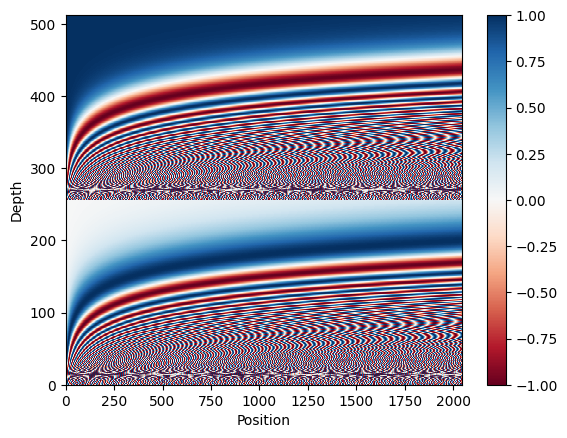

In [2]:
import matplotlib.pyplot as plt

pos_encoding = positional_encoding(length=2048, depth=512)

# Check the shape.
print(pos_encoding.shape)

# Plot the dimensions.
plt.pcolormesh(pos_encoding.numpy().T, cmap='RdBu')
plt.ylabel('Depth')
plt.xlabel('Position')
plt.colorbar()
plt.show()

The purpose of this visualization is to help us understand the positional encoding matrix and observe how it varies across different positions and depths in the sequence. It also ensures that the encoding values are appropriately normalized and distributed throughout the matrix.

To provide a visual representation, we will plot the cosine similarity between the positional encoding vector at index 1000 and all the other vectors in the positional encoding matrix.

Before calculating the cosine similarity, the positional encoding vectors undergo L2 normalization. Then, using the einsum function, the code computes the dot product between the positional encoding vector at index 1000 and each vector in the matrix. The resulting dot products are displayed in a graph, where the y-axis represents the cosine similarity values between the vectors.

(0.0, 1.0)

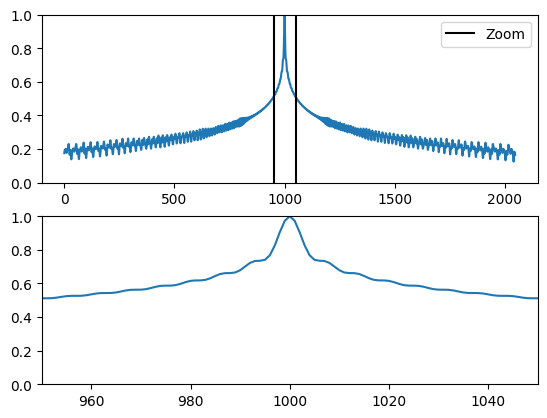

In [3]:
pos_encoding /= tf.norm(pos_encoding, axis=1, keepdims=True)
p = pos_encoding[1000]
dots = tf.einsum('pd,d->p', pos_encoding, p).numpy()

plt.subplot(2, 1, 1)
plt.plot(dots)
plt.ylim([0, 1])
plt.plot([950, 950, float('nan'), 1050, 1050], [0, 1, float('nan'), 0, 1], color='k', label='Zoom')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(range(len(dots)), dots)
plt.xlim([950, 1050])
plt.ylim([0, 1])

The visualization consists of two plots. The first plot displays the entire cosine similarity graph, while the second plot zooms in on a specific range of values between index 950 and 1050.

This visualization aims to demonstrate how the positional encoding vectors capture the position information of each token in the sequence. When the cosine similarity values are high between vectors, it suggests that they are positioned closely along the position axis. This indicates that these vectors share similar positional information, emphasizing the importance of positional encoding in preserving the order of tokens within the sequence.

### 2.2. PositionalEmbedding layer

Now, when we know how to implement positional encoding, we can create a custom layer that will combine positional encoding with token embedding. This layer will be used in Encoder and Decoder layers:

In [4]:
class PositionalEmbedding(tf.keras.layers.Layer):
    """
    A positional embedding layer combines the input embedding with a positional encoding that helps the Transformer
    to understand the relative position of the input tokens. This layer takes the input of tokens and converts them
    into sequence of embeddings vector. Then, it adds the positional encoding to the embeddings.

    Methods:
        compute_mask: Computes the mask to be applied to the embeddings.
        call: Performs the forward pass of the layer.
    """
    def __init__(self, vocab_size: int, d_model: int, embedding: tf.keras.layers.Embedding=None):
        """ Constructor of the PositionalEmbedding layer.

        Args:
            vocab_size (int): The size of the vocabulary. I. e. the number of unique tokens in the input sequence.
            d_model (int): The dimensionality of the embedding vector.
            embedding (tf.keras.layers.Embedding): The custom embedding layer. If None, a default embedding layer will be created.
        """
        super().__init__()
        self.d_model = d_model
        self.embedding = tf.keras.layers.Embedding(vocab_size, d_model, mask_zero=True) if embedding is None else embedding
        self.pos_encoding = positional_encoding(length=2048, depth=d_model)

    def compute_mask(self, *args, **kwargs):
        """ Computes the mask to be applied to the embeddings.
        """
        return self.embedding.compute_mask(*args, **kwargs)

    def call(self, x: tf.Tensor) -> tf.Tensor:
        """ Performs the forward pass of the layer.
        
        Args:
            x (tf.Tensor): The input tensor of shape (batch_size, seq_length).

        Returns:
            tf.Tensor: The output sequence of embedding vectors with added positional information. The shape is
                (batch_size, seq_length, d_model).
        """
        x = self.embedding(x)
        length = tf.shape(x)[1]
        # This factor sets the relative scale of the embedding and positonal_encoding.
        x *= tf.math.sqrt(tf.cast(self.d_model, tf.float32))
        x = x + self.pos_encoding[tf.newaxis, :length, :]
        return x

Above we created a `PositionalEmbedding` layer that combines an embedding layer and a positional encoding function. The class takes two arguments: `vocab_size` which is the size of the vocabulary of the input sequences and `d_model` which is the size of the embedding and positional encoding vectors. This layer purpose is to to encode input sequences in a transformer model by adding positional information to the token embeddings.

In the constructor of this class, two important components are created. Firstly, an `Embedding` layer is established to convert input tokens into embedding vectors. Secondly, a positional encoding matrix is generated using the `positional_encoding` function, having a shape of `(max_length, d_model)`.

The `compute_mask` method of this class is responsible for producing a mask that matches the shape of the input tensor destined for the embedding layer.

In the call method, the input tensor undergoes two main steps. Firstly, it is passed through the embedding layer to obtain the embedding output. Secondly, the output is scaled by the square root of the `d_model` value. Next, the positional encoding matrix is added to the embedding output corresponding to each input token. Lastly, the encoded input sequence is returned as the final output.

In most cases, when constructing a Transformer model we would create two separate positional embedding layers for the `encoder` and `decoder` components. Because the encoder and decoder have different input sequences, they require different positional encoding matrices. However, in this tutorial, we'll test the output of this layer by creating a single positional embedding layer and as an input we'll use random sequences of integers:

In [5]:
vocab_size = 1000
d_model = 512

embedding_layer = PositionalEmbedding(vocab_size, d_model)

random_input = np.random.randint(0, vocab_size, size=(1, 100))

output = embedding_layer(random_input)
print("random_input shape", random_input.shape)
print("PositionalEmbedding output", output.shape)

random_input shape (1, 100)
PositionalEmbedding output (1, 100, 512)


As we can see, we created a random input tensor of shape `(1, 100)` and passed it through the `PositionalEmbedding` layer. The output of this layer has a shape of `(1, 100, 512)`, where 100 is the length of the input sequence and 512 is the dimensionality of the embedding and positional encoding vectors.

Each token in the input sequence is represented by a vector of size 512. The positional encoding vectors are added to the embedding vectors, providing information about the position of each token in the sequence. This allows the model to understand the order of tokens in the input sequence.

## 3. Implementing Attention Layers
### 3.1. Add & Norm layer

If you would pay attention into Transformer architecture, you may noticed that there is `Add & Norm` layer after each attention layer. This layer is responsible for adding the residual connection and applying layer normalization:

<center><img src="https://www.tensorflow.org/images/tutorials/transformer/Add+Norm.png"/></center>

The Transformer model utilizes "Add & Norm" blocks to facilitate efficient training. These blocks incorporate two important components: a residual connection and a LayerNormalization layer.

The residual connection establishes a direct path for the gradient, ensuring that vectors are updated rather than completely replaced by the attention layers. This helps with gradient flow during training. On the other hand, the LayerNormalization layer maintains a reasonable scale for the outputs, enhancing the stability and performance of the model.

Throughout the model, these "Add & Norm" blocks are strategically placed, and the code is organized accordingly. To handle these blocks, custom layer classes are defined. In particular, the Add layer is employed in the implementation to ensure that Keras masks are appropriately propagated. This is necessary because the "+" operator alone does not handle mask propagation.

In summary, the "Add & Norm" blocks play a crucial role in the Transformer model, ensuring effective training by incorporating residual connections and LayerNormalization. Custom layer classes are utilized to handle these blocks, with the Add layer addressing mask propagation within the implementation.

### 3.2. BaseAttention layer

The attention mechanism is the core component of the `Transformer` model. It enables the model to focus on the relevant parts of the input sequence when processing each token. This is achieved by calculating the attention weights between the query and key vectors of each token in the sequence. The attention weights are then multiplied by the value vectors to obtain the context vector, which is the output of the attention layer.

We'll implement all the attention layers used in Transformer model. First, we'll create a base class for all attention layers:

<center><img src="https://www.tensorflow.org/images/tutorials/transformer/BaseAttention.png"/></center>

These are all identical except for how the attention is configured. Each one contains a `layers.MultiHeadAttention`, a `layers.LayerNormalization` and a `layers.Add`. So, we can create a base class that takes care of all of this. The only thing we need to do is to implement the `call` method.

To implement the `attention` layers, we can begin by creating a basic class that includes the necessary component layers. Each specific use-case can then be implemented as a subclass of this base class. Although this approach requires writing a bit more code, it helps maintain clarity and ensures that the purpose of each subclass remains apparent:

In [6]:
class BaseAttention(tf.keras.layers.Layer):
    """
    Base class for all attention layers. It contains the common functionality of all attention layers.
    This layer contains a MultiHeadAttention layer, a LayerNormalization layer and an Add layer.
    It is used as a base class for the GlobalSelfAttention, CausalSelfAttention and CrossAttention layers.
    And it is not intended to be used directly.

    Methods:
        call: Performs the forward pass of the layer.

    Attributes:
        mha (tf.keras.layers.MultiHeadAttention): The MultiHeadAttention layer.
        layernorm (tf.keras.layers.LayerNormalization): The LayerNormalization layer.
        add (tf.keras.layers.Add): The Add layer.
    """
    def __init__(self, **kwargs: dict):
        """ Constructor of the BaseAttention layer.
        
        Args:
            **kwargs: Additional keyword arguments that are passed to the MultiHeadAttention layer, e. g. 
                        num_heads (number of heads), key_dim (dimensionality of the key space), etc.
        """
        super().__init__()
        self.mha = tf.keras.layers.MultiHeadAttention(**kwargs)
        self.layernorm = tf.keras.layers.LayerNormalization()
        self.add = tf.keras.layers.Add()

Within the class, there are three important layers: `tf.keras.layers.MultiHeadAttention`, `tf.keras.layers.LayerNormalization`, and `tf.keras.layers.Add`.

- The `MultiHeadAttention` layer computes the attention weights, which determine the relevance or importance of different parts of the input and output sequences.

- The `LayerNormalization` layer normalizes the activations of the layer, ensuring that they have a consistent scale across both the batch and feature dimensions.

- The `Add` layer incorporates a residual connection. It adds the output of the `MultiHeadAttention` layer to the original input sequence, allowing the model to retain information from the initial input while incorporating the attention-based updates.

By creating a base class that includes these layers, we can reuse the code and easily create different attention mechanisms. This is achieved by inheriting from the base class and specifying the unique implementation details for each specific attention mechanism. This approach aids in maintaining code organization and clarity throughout the implementation.

### But still, you may ask, **how it works**?

In an attention layer, there are two main inputs: the **query sequence** and the **context sequence**. The query sequence represents the sequence we are currently focusing on, while the context sequence is the sequence we are seeking information from. The output of the attention layer has the same shape as the query sequence.

The operation of an attention layer can be likened to a dictionary lookup, but with some distinct characteristics. Like a regular dictionary, a query is used to search for relevant information, which is represented by **keys** and **values**. In a standard dictionary, an exact match between the query and a key is necessary to retrieve the corresponding value. However, in an attention layer, the match does not need to be exact; it can be fuzzy or approximate.

For example, if we searched for the key "species" in the dictionary `{'color': 'blue', 'age': 22, 'type': 'pickup'}`, the best match might be the value "pickup" even though the query and key don't match perfectly.

**In an attention layer, multiple values are combined based on their similarity to the query, rather than returning a single value**. Each component (query, key, and value) in the attention layer is represented as vectors. Instead of using a traditional dictionary lookup, the attention layer calculates an attention score by comparing the query and key vectors. The values are then combined by taking a weighted average, where the weights are determined by the attention scores.

In the context of natural language processing (NLP), the query sequence can provide a query vector at each position, while the context sequence serves as the dictionary, with key and value vectors at each position. Prior to using the input vectors, the `layers.MultiHeadAttention` layer employs `layers.Dense` layers to project these vectors.

So now let's use this class to create other attention layers. We will create:

- The cross attention layer: Decoder-encoder attention
- The global self attention layer: Encoder self-attention
- The causal self attention layer: Decoder self-attention

### 3.3 CrossAttention layer

The cross attention layer is used to calculate the attention weights between the encoder and decoder sequences: 

<center><img src="https://www.tensorflow.org/images/tutorials/transformer/CrossAttention.png"/></center>

The query vectors are taken from the decoder, while the key and value vectors are taken from the encoder. This allows the decoder to focus on relevant parts of the input sequence when generating a token at each position.

When implementing this layer, we pass the target (expected Transformer results) sequence `x` as the `query` and the context (inputs to the Encoder layer) sequence as the `value` and `key`:


In [7]:
class CrossAttention(BaseAttention):
    """
    A class that implements the cross-attention layer by inheriting from the BaseAttention class.
    This layer is used to process two different sequences and attends to the context sequence while processing the query sequence.

    Methods:
        call: Performs the forward pass of the layer.    

    Attributes:
        mha (tf.keras.layers.MultiHeadAttention): The MultiHeadAttention layer.
        layernorm (tf.keras.layers.LayerNormalization): The LayerNormalization layer.
        add (tf.keras.layers.Add): The Add layer.
    """
    def call(self, x: tf.Tensor, context: tf.Tensor) -> tf.Tensor:
        """
        The call function that performs the cross-attention operation.

        Args:
            x (tf.Tensor): The query (expected Transformer results) sequence of shape (batch_size, seq_length, d_model).
            context (tf.Tensor): The context (inputs to the Encoder layer) sequence of shape (batch_size, seq_length, d_model).

        Returns:
            tf.Tensor: The output sequence of shape (batch_size, seq_length, d_model).
        """
        attn_output, attn_scores = self.mha(query=x, key=context, value=context, return_attention_scores=True)

        # Cache the attention scores for plotting later.
        self.last_attn_scores = attn_scores

        x = self.add([x, attn_output])
        x = self.layernorm(x)

        return x

Let's test this CrossAttention layer. To do so, we'll create a simulated random data that we pass throught PositionalEncoding layer and then to the CrossAttention layer:

In [8]:
encoder_vocab_size = 1000
decoder_vocab_size = 1100
d_model = 512

encoder_embedding_layer = PositionalEmbedding(vocab_size, d_model)
decoder_embedding_layer = PositionalEmbedding(vocab_size, d_model)

random_encoder_input = np.random.randint(0, encoder_vocab_size, size=(1, 100))
random_decoder_input = np.random.randint(0, decoder_vocab_size, size=(1, 110))

encoder_embeddings = encoder_embedding_layer(random_encoder_input)
decoder_embeddings = decoder_embedding_layer(random_decoder_input)

print("encoder_embeddings shape", encoder_embeddings.shape)
print("decoder_embeddings shape", decoder_embeddings.shape)

cross_attention_layer = CrossAttention(num_heads=2, key_dim=512)
cross_attention_output = cross_attention_layer(decoder_embeddings, encoder_embeddings)

print("cross_attention_output shape", cross_attention_output.shape)

encoder_embeddings shape (1, 100, 512)
decoder_embeddings shape (1, 110, 512)


cross_attention_output shape (1, 110, 512)


You can see that the output shape from `CrossAttention` layer is the same as the decoder embedding shape. This is because the output of the cross attention layer is the same as the query sequence, which is the target sequence in this case. The simplified diagram below illustrates the information flow in the cross attention layer:

<center><img src="https://www.tensorflow.org/images/tutorials/transformer/CrossAttention-new-full.png" width="450" alt="transformer cross attention layer"></center>

### 3.4 GlobalSelfAttention layer

The GlobalSelfAttention layer is responsible for processing the context (encoder input) sequence, and propagating information along its length:

<center><img src="https://www.tensorflow.org/images/tutorials/transformer/SelfAttention.png" width="450" alt="transformer cross attention layer"></center>

The GlobalSelfAttention layer lets every sequence element directly access every other sequence element, with only a few operations, and all the outputs can be computed in parallel.

While implementing this layer, we just need to pass the target sequence, `x`, as both the `query`, and `value` arguments to the `mha` layer:

In [9]:
class GlobalSelfAttention(BaseAttention):
    """
    A class that implements the global self-attention layer by inheriting from the BaseAttention class.
    This layer is used to process a single sequence and attends to all the tokens in the sequence.

    Methods:
        call: Performs the forward pass of the layer.

    Attributes:
        mha (tf.keras.layers.MultiHeadAttention): The MultiHeadAttention layer.
        layernorm (tf.keras.layers.LayerNormalization): The LayerNormalization layer.
        add (tf.keras.layers.Add): The Add layer.
    """
    def call(self, x: tf.Tensor) -> tf.Tensor:
        """
        The call function that performs the global self-attention operation.

        Args:
            x (tf.Tensor): The input sequence of shape (batch_size, seq_length, d_model).

        Returns:
            tf.Tensor: The output sequence of shape (batch_size, seq_length, d_model).
        """
        attn_output = self.mha(query=x, value=x, key=x)
        x = self.add([x, attn_output])
        x = self.layernorm(x)
        return x

The Multi-Head Attention (MHA) mechanism calculates a weighted average of values based on the similarity between queries and keys. The attention scores assigned to each value determine its importance.

In simpler terms, the MHA learns to focus on different parts of the input sequence, allowing the model to extract relevant information for a specific task. In the case of `GlobalSelfAttention`, where the input sequence serves as both the `query` and `key`, it captures the relationships between each position and all other positions in the sequence. We can visualize this process as follows:

<center><img src="https://www.tensorflow.org/images/tutorials/transformer/SelfAttention-new-full.png" width="450" alt="transformer cross attention layer"></center>

Subsequently, the output of the MHA is added to the original input. This result is then passed through layer normalization, which stabilizes the training process and enhances the model's performance. Ultimately, this normalized output represents the final output of the attention layer.

Let's test it out:

In [10]:
encoder_vocab_size = 1000
d_model = 512

encoder_embedding_layer = PositionalEmbedding(vocab_size, d_model)

random_encoder_input = np.random.randint(0, encoder_vocab_size, size=(1, 100))

encoder_embeddings = encoder_embedding_layer(random_encoder_input)

print("encoder_embeddings shape", encoder_embeddings.shape)

cross_attention_layer = GlobalSelfAttention(num_heads=2, key_dim=512)
cross_attention_output = cross_attention_layer(encoder_embeddings)

print("global_self_attention_output shape", cross_attention_output.shape)

encoder_embeddings shape (1, 100, 512)
global_self_attention_output shape (1, 100, 512)


### 3.5 CausalSelfAttention layer

The `CausalSelfAttention` layer is responsible for processing the target (decoder input) sequence, and propagating information along its length:

<center><img src="https://www.tensorflow.org/images/tutorials/transformer/CausalSelfAttention.png" width="450" alt="transformer cross attention layer"></center>

Similarly as the `GlobalSelfAttention` layer, the `CausalSelfAttention` layer lets every sequence element directly access every other sequence element, with only a few operations, and all the outputs can be computed in parallel.

But `CausalSelfAttention` layer is different from `GlobalSelfAttention` because it is used to prevent leftward information flow in the decoder. Masking plays a key role in this process, as it prevents the model from attending to future tokens during training. This masking process is illustrated in the diagram below:

<center><img src="https://www.tensorflow.org/images/tutorials/transformer/CausalSelfAttention-new-full.png" width="450" alt="transformer cross attention layer"></center>

The causal mask ensures that each location only has access to the locations that come before it.

Lets write this layer in code:

In [11]:
class CausalSelfAttention(BaseAttention):
    """
    Call self attention on the input sequence, ensuring that each position in the 
    output depends only on previous positions (i.e. a causal model).

    Methods:
        call: Performs the forward pass of the layer.

    Attributes:
        mha (tf.keras.layers.MultiHeadAttention): The MultiHeadAttention layer.
        layernorm (tf.keras.layers.LayerNormalization): The LayerNormalization layer.
        add (tf.keras.layers.Add): The Add layer.
    """
    def call(self, x: tf.Tensor) -> tf.Tensor:
        """
        The call function that performs the causal self-attention operation.
        
        Args:
            x (tf.Tensor): The input sequence of shape (batch_size, seq_length, d_model).

        Returns:
            tf.Tensor: The output sequence of shape (batch_size, seq_length, d_model).
        """
        attn_output = self.mha(query=x, value=x, key=x, use_causal_mask = True)
        x = self.add([x, attn_output])
        x = self.layernorm(x)
        return x

You may notice, that the `CausalSelfAttention` layer is very similar to the `GlobalSelfAttention` layer. The only difference is that the `CausalSelfAttention` layer uses a causal mask to prevent the decoder from attending to future tokens during training.

As before, let's test this `CausalSelfAttention` layer. To do so, we'll create a simulated random data that we pass throught PositionalEncoding layer and then to the `CausalSelfAttention` layer:

In [12]:
decoder_vocab_size = 1100
d_model = 512

decoder_embedding_layer = PositionalEmbedding(vocab_size, d_model)

random_decoder_input = np.random.randint(0, decoder_vocab_size, size=(1, 110))

decoder_embeddings = decoder_embedding_layer(random_decoder_input)

print("decoder_embeddings shape", decoder_embeddings.shape)

causal_self_attention_layer = CausalSelfAttention(num_heads=2, key_dim=512)
causal_self_attention_output = causal_self_attention_layer(decoder_embeddings)

print("causal_self_attention_output shape", causal_self_attention_output.shape)

out1 = causal_self_attention_layer(decoder_embedding_layer(random_decoder_input[:, :50])) # Only the first 50 tokens beffore applying the embedding layer
out2 = causal_self_attention_layer(decoder_embedding_layer(random_decoder_input)[:, :50]) # Only the first 50 tokens after applying the embedding layer

diff = tf.reduce_max(tf.abs(out1 - out2)).numpy()

print("Difference between the two outputs:", diff)

decoder_embeddings shape (1, 110, 512)
causal_self_attention_output shape (1, 110, 512)
Difference between the two outputs: 0.0


The output for early sequence elements doesn't depend on later elements, so it shouldn't matter if you trim elements before or after applying the embedding layer. Basically, the difference between these two approaches is zero.

### 3.6 FeedForward layer

Looking closer at the encoder and decoder layers, we can see that there is a `FeedForward` layer after each attention layer:

<center><img src="https://www.tensorflow.org/images/tutorials/transformer/FeedForward.png" width="450" alt="transformer cross attention layer"></center>

The `FeedForward` layer consists of two dense layers that are applied to each position separately and identically. The `FeedForward` layer is primarily used to transform the representation of the input sequence into a form that is more suitable for the task at hand. This is achieved by applying a linear transformation, followed by a non-linear activation function. The output of the `FeedForward` layer has the same shape as the input, which is then added to the original input.

Let's implement this layer:

In [13]:
class FeedForward(tf.keras.layers.Layer):
    """
    A class that implements the feed-forward layer.

    Methods:
        call: Performs the forward pass of the layer.

    Attributes:
        seq (tf.keras.Sequential): The sequential layer that contains the feed-forward layers. It applies the two feed-forward layers and the dropout layer.
        add (tf.keras.layers.Add): The Add layer.
        layer_norm (tf.keras.layers.LayerNormalization): The LayerNormalization layer.
    """
    def __init__(self, d_model: int, dff: int, dropout_rate: float=0.1):
        """
        Constructor of the FeedForward layer.

        Args:
            d_model (int): The dimensionality of the model.
            dff (int): The dimensionality of the feed-forward layer.
            dropout_rate (float): The dropout rate.
        """
        super().__init__()
        self.seq = tf.keras.Sequential([
            tf.keras.layers.Dense(dff, activation='relu'),
            tf.keras.layers.Dense(d_model),
            tf.keras.layers.Dropout(dropout_rate)
        ])
        self.add = tf.keras.layers.Add()
        self.layer_norm = tf.keras.layers.LayerNormalization()

    def call(self, x: tf.Tensor) -> tf.Tensor:
        """
        The call function that performs the feed-forward operation. 

        Args:
            x (tf.Tensor): The input sequence of shape (batch_size, seq_length, d_model).

        Returns:
            tf.Tensor: The output sequence of shape (batch_size, seq_length, d_model).
        """
        x = self.add([x, self.seq(x)])
        x = self.layer_norm(x) 
        return x

Let's test the FeedForward layer. We will use the same random input as before. The output shape should be the same as the input shape.

In [14]:
encoder_vocab_size = 1000
d_model = 512

encoder_embedding_layer = PositionalEmbedding(vocab_size, d_model)

random_encoder_input = np.random.randint(0, encoder_vocab_size, size=(1, 100))

encoder_embeddings = encoder_embedding_layer(random_encoder_input)

print("encoder_embeddings shape", encoder_embeddings.shape)

feed_forward_layer = FeedForward(d_model, dff=2048)
feed_forward_output = feed_forward_layer(encoder_embeddings)

print("feed_forward_output shape", feed_forward_output.shape)

encoder_embeddings shape (1, 100, 512)
feed_forward_output shape (1, 100, 512)


## 4. Implementing Encoder and Decoder layers
### 4.1. EncoderLayer layer

Great, now we have all the layers we need to implement the Encoder and Decoder layers. Let's start with the EncoderLayer layer. Why it called `EncoderLayer`? Because it is a single layer of the Encoder. The Encoder is composed of multiple EncoderLayers. The same goes for the Decoder:

<center><img src="https://www.tensorflow.org/images/tutorials/transformer/EncoderLayer.png" width="600" alt=""></center>

The EncoderLayer consists of two sublayers: a `MultiHeadAttention` layer, more specifically `GlobalSelfAttention` layer and a `FeedForward` layer. Each of these sublayers has a residual connection around it, followed by a layer normalization. Residual connections help in avoiding the vanishing gradient problem in deep networks. Let's implement this layer:

In [15]:
class EncoderLayer(tf.keras.layers.Layer):
    """
    A single layer of the Encoder. Usually there are multiple layers stacked on top of each other.

    Methods:
        call: Performs the forward pass of the layer.

    Attributes:
        self_attention (GlobalSelfAttention): The global self-attention layer.
        ffn (FeedForward): The feed-forward layer.
    """
    def __init__(self, d_model: int, num_heads: int, dff: int, dropout_rate: float=0.1):
        """
        Constructor of the EncoderLayer.

        Args:
            d_model (int): The dimensionality of the model.
            num_heads (int): The number of heads in the multi-head attention layer.
            dff (int): The dimensionality of the feed-forward layer.
            dropout_rate (float): The dropout rate.
        """
        super().__init__()

        self.self_attention = GlobalSelfAttention(
            num_heads=num_heads,
            key_dim=d_model,
            dropout=dropout_rate
            )

        self.ffn = FeedForward(d_model, dff)

    def call(self, x: tf.Tensor) -> tf.Tensor:
        """
        The call function that performs the forward pass of the layer.

        Args:
            x (tf.Tensor): The input sequence of shape (batch_size, seq_length, d_model).

        Returns:
            tf.Tensor: The output sequence of shape (batch_size, seq_length, d_model).
        """
        x = self.self_attention(x)
        x = self.ffn(x)
        return x

Now let's test it out. We will use the same random input as before. The output shape should be the same as the input shape:

In [16]:
encoder_vocab_size = 1000
d_model = 512

encoder_embedding_layer = PositionalEmbedding(vocab_size, d_model)

random_encoder_input = np.random.randint(0, encoder_vocab_size, size=(1, 100))

encoder_embeddings = encoder_embedding_layer(random_encoder_input)

print("encoder_embeddings shape", encoder_embeddings.shape)

encoder_layer = EncoderLayer(d_model, num_heads=2, dff=2048)

encoder_layer_output = encoder_layer(encoder_embeddings)

print("encoder_layer_output shape", encoder_layer_output.shape)

encoder_embeddings shape (1, 100, 512)
encoder_layer_output shape (1, 100, 512)


Great! We have implemented the EncoderLayer layer. The output shape is the same as the input shape. This is because the output of the EncoderLayer is the same as the output of the `FeedForward` layer, which has the same shape as the input. Now, let's combine multiple EncoderLayers to create the Encoder.

### 4.2. Encoder layer

Now let's implement the Encoder layer. The Encoder has integrated the `PositionalEmbedding` layer, the multiple of `EncoderLayer` layers, and the `Dropout` layer. The output of each EncoderLayer is passed to the next EncoderLayer. The output of the last EncoderLayer is the output of the Encoder. In the following image you can see the Encoder marked in red:

<center><img src="https://www.tensorflow.org/images/tutorials/transformer/Encoder.png" width="600" alt=""></center>

Let's implement the `Encoder` layer in code:

In [17]:
class Encoder(tf.keras.layers.Layer):
    """
    A custom TensorFlow layer that implements the Encoder. This layer is mostly used in the Transformer models 
    for natural language processing tasks, such as machine translation, text summarization or text classification.

    Methods:
        call: Performs the forward pass of the layer.

    Attributes:
        d_model (int): The dimensionality of the model.
        num_layers (int): The number of layers in the encoder.
        pos_embedding (PositionalEmbedding): The positional embedding layer.
        enc_layers (list): The list of encoder layers.
        dropout (tf.keras.layers.Dropout): The dropout layer.
    """
    def __init__(self, num_layers: int, d_model: int, num_heads: int, dff: int, vocab_size: int, dropout_rate: float=0.1):
        """
        Constructor of the Encoder.

        Args:
            num_layers (int): The number of layers in the encoder.
            d_model (int): The dimensionality of the model.
            num_heads (int): The number of heads in the multi-head attention layer.
            dff (int): The dimensionality of the feed-forward layer.
            vocab_size (int): The size of the vocabulary.
            dropout_rate (float): The dropout rate.
        """
        super().__init__()

        self.d_model = d_model
        self.num_layers = num_layers

        self.pos_embedding = PositionalEmbedding(vocab_size=vocab_size, d_model=d_model)

        self.enc_layers = [
            EncoderLayer(d_model=d_model,
                        num_heads=num_heads,
                        dff=dff,
                        dropout_rate=dropout_rate)
            for _ in range(num_layers)]
        self.dropout = tf.keras.layers.Dropout(dropout_rate)

    def call(self, x: tf.Tensor) -> tf.Tensor:
        """
        The call function that performs the forward pass of the layer.
        
        Args:
            x (tf.Tensor): The input sequence of shape (batch_size, seq_length).

        Returns:
            tf.Tensor: The output sequence of shape (batch_size, seq_length, d_model).
        """
        x = self.pos_embedding(x)  
        # here x has shape `(batch_size, seq_len, d_model)`

        # Add dropout.
        x = self.dropout(x)

        for i in range(self.num_layers):
            x = self.enc_layers[i](x)

        return x  # Shape `(batch_size, seq_len, d_model)`.

If you were following this tutorial step-by-step you should already see, that we simply combines everything what we covered before and constructed the Encoder layer. Let's test it out. We will use the same random input as before. As input we'll generate a random sequence as before, what in real life would be the sequence of tokenized words.

In [18]:
encoder_vocab_size = 1000
d_model = 512

encoder = Encoder(num_layers=2, d_model=d_model, num_heads=2, dff=2048, vocab_size=encoder_vocab_size)

random_encoder_input = np.random.randint(0, encoder_vocab_size, size=(1, 100))

encoder_output = encoder(random_encoder_input)

print("random_encoder_input shape", random_encoder_input.shape)
print("encoder_output shape", encoder_output.shape)

random_encoder_input shape (1, 100)
encoder_output shape (1, 100, 512)


Now we have implemented the Encoder layer. If everything is clear up to this point, you can move on to the Decoder layer. But if you are still confused, I recommend you to go back and read the previous sections again.

### 4.3. DecoderLayer layer

The DecoderLayer is similar to the EncoderLayer, but it has an additional `CrossAttention` layer between the `CausalSelfAttention` layer and the `FeedForward` layer:

<center><img src="https://www.tensorflow.org/images/tutorials/transformer/DecoderLayer.png" width="600" alt=""></center>

The `CrossAttention` layer is responsible for calculating the attention weights between the decoder input and the encoder output. The `CausalSelfAttention` layer is responsible for calculating the attention weights between the decoder input and the decoder output. The `FeedForward` layer is responsible for transforming the representation of the input sequence into a form that is more suitable for the task at hand.

Let's implement the `DecoderLayer` layer:

In [19]:
class DecoderLayer(tf.keras.layers.Layer):
    """
    A single layer of the Decoder. Usually there are multiple layers stacked on top of each other.
    
    Methods:
        call: Performs the forward pass of the layer.

    Attributes:
        causal_self_attention (CausalSelfAttention): The causal self-attention layer.
        cross_attention (CrossAttention): The cross-attention layer.
        ffn (FeedForward): The feed-forward layer.
    """
    def __init__(self, d_model: int, num_heads: int, dff: int, dropout_rate: float=0.1):
        """
        Constructor of the DecoderLayer.

        Args:
            d_model (int): The dimensionality of the model.
            num_heads (int): The number of heads in the multi-head attention layer.
            dff (int): The dimensionality of the feed-forward layer.
            dropout_rate (float): The dropout rate. 
        """
        super(DecoderLayer, self).__init__()

        self.causal_self_attention = CausalSelfAttention(
            num_heads=num_heads,
            key_dim=d_model,
            dropout=dropout_rate)

        self.cross_attention = CrossAttention(
            num_heads=num_heads,
            key_dim=d_model,
            dropout=dropout_rate)

        self.ffn = FeedForward(d_model, dff)

    def call(self, x: tf.Tensor, context: tf.Tensor) -> tf.Tensor:
        """
        The call function that performs the forward pass of the layer.

        Args:
            x (tf.Tensor): The input sequence of shape (batch_size, seq_length, d_model). x is usually the output of the previous decoder layer.
            context (tf.Tensor): The context sequence of shape (batch_size, seq_length, d_model). Context is usually the output of the encoder.
        """
        x = self.causal_self_attention(x=x)
        x = self.cross_attention(x=x, context=context)

        # Cache the last attention scores for plotting later
        self.last_attn_scores = self.cross_attention.last_attn_scores

        x = self.ffn(x)  # Shape `(batch_size, seq_len, d_model)`.
        return x

Let's do short analysis, what we have done here. We have implemented the `DecoderLayer` layer. The `DecoderLayer` layer consists of three sublayers: a `CausalSelfAttention` layer, a `CrossAttention` layer, and a `FeedForward` layer. Each of these sublayers has a residual connection around it, followed by a layer normalization. The output of each sublayer is `LayerNormalization(x + Sublayer(x))`. The output of the `DecoderLayer` is the same as the output of the `FeedForward` layer, which has the same shape as the input.

If we'll take for example translation task from spanish to english, here `context` would be spanish sentence and `x` would be english sentence. At first iteration we don't have any input to decoder, except some `<start>` token and for the encoder we have all sentence. So we input these to this layer. Then it calculates the attention weights between the decoder input and the encoder output. Then it calculates the attention weights between the decoder input and the decoder output. Then it transforms the representation of the input sequence into a form that is more suitable for the task at hand. Then it outputs the result. 

After first iteration, we now have for example `<start> Hello` as output from decoder. So we repeat above steps untill the end of the sentence. After all iterations we have translated sentence, for example `<start> Hello, how are you? <end>`. That's the whole idea of iteratons in decoder.

As before, we need to test this layer. We'll generate a random integers list, that gonna be our tokenized sentence. Then we'll push this data into embedding layer, to give us embeddings for each token. Then we'll push this data into decoderLayer layer along with encoder output data, and we'll get the output. Let's do it:

In [24]:
# Test DecoderLayer layer
decoder_vocab_size = 1000
d_model = 512
dff = 2048
num_heads = 8

decoder_layer = DecoderLayer(d_model, num_heads, dff)

random_decoderLayer_input = np.random.randint(0, decoder_vocab_size, size=(1, 110))

decoder_embeddings = encoder_embedding_layer(random_decoderLayer_input)

decoderLayer_output = decoder_layer(decoder_embeddings, encoder_output)

print("random_decoder_input shape", random_decoderLayer_input.shape)
print("decoder_embeddings shape", decoder_embeddings.shape)
print("decoder_output shape", decoderLayer_output.shape)

random_decoder_input shape (1, 110)
decoder_embeddings shape (1, 110, 512)
decoder_output shape (1, 110, 512)


### 4.4. Decoder layer

Now let's implement the `Decoder` layer, it is very similar to `Encoder` layer. The Decoder has integrated the `PositionalEmbedding` layer, the multiple of `DecoderLayer` layers, and the `Dropout` layer. The output of each DecoderLayer is passed to the next DecoderLayer. The output of the last DecoderLayer is the output of the Decoder. In the following image you can see the Decoder marked in red:

<center><img src="https://www.tensorflow.org/images/tutorials/transformer/Decoder.png" width="600" alt=""></center>

Let's implement the `Decoder` layer in code:

In [36]:
class Decoder(tf.keras.layers.Layer):
    """
    A custom TensorFlow layer that implements the Decoder. This layer is mostly used in the Transformer models
    for natural language processing tasks, such as machine translation, text summarization or text classification.

    Methods:
        call: Performs the forward pass of the layer.

    Attributes:
        d_model (int): The dimensionality of the model.
        num_layers (int): The number of layers in the decoder.
        pos_embedding (PositionalEmbedding): The positional embedding layer.
        dec_layers (list): The list of decoder layers.
        dropout (tf.keras.layers.Dropout): The dropout layer.
    """
    def __init__(self, num_layers: int, d_model: int, num_heads: int, dff: int, vocab_size: int, dropout_rate: float=0.1):
        """
        Constructor of the Decoder.

        Args:
            num_layers (int): The number of layers in the decoder.
            d_model (int): The dimensionality of the model.
            num_heads (int): The number of heads in the multi-head attention layer.
            dff (int): The dimensionality of the feed-forward layer.
            vocab_size (int): The size of the vocabulary.
            dropout_rate (float): The dropout rate.
        """
        super(Decoder, self).__init__()

        self.d_model = d_model
        self.num_layers = num_layers

        self.pos_embedding = PositionalEmbedding(vocab_size=vocab_size, d_model=d_model)
        self.dropout = tf.keras.layers.Dropout(dropout_rate)
        self.dec_layers = [
            DecoderLayer(
                d_model=d_model, 
                num_heads=num_heads, 
                dff=dff, 
                dropout_rate=dropout_rate) for _ in range(num_layers)]

        self.last_attn_scores = None

    def call(self, x: tf.Tensor, context: tf.Tensor) -> tf.Tensor:
        """
        The call function that performs the forward pass of the layer.

        Args:
            x (tf.Tensor): The input sequence of shape (batch_size, target_seq_len).
            context (tf.Tensor): The context sequence of shape (batch_size, input_seq_len, d_model).
        """
        # `x` is token-IDs shape (batch, target_seq_len)
        x = self.pos_embedding(x)  # (batch_size, target_seq_len, d_model)

        x = self.dropout(x)

        for i in range(self.num_layers):
            x  = self.dec_layers[i](x, context)

        self.last_attn_scores = self.dec_layers[-1].last_attn_scores

        # The shape of x is (batch_size, target_seq_len, d_model).
        return x

The `Decoder` class requires two inputs: a sequence of token-IDs representing the target sequence and an encoded input sequence, also known as the `context`. The class is comprised of multiple `DecoderLayer` instances that perform various operations on the input sequence to produce an output sequence.

When the `Decoder` class is instantiated, it sets up several layers, such as the `PositionalEmbedding` layer, responsible for adding positional information to the input token-IDs, a dropout layer for regularization, and a stack of `DecoderLayer` instances.

During a forward pass, the input token-IDs go through the positional embedding and dropout layers. Then, for each `DecoderLayer`, the input undergoes causal self-attention, followed by cross-attention, and finally, a feed-forward neural network layer. The output of the last DecoderLayer is returned as the final output of the Decoder.

The `last_attn_scores` attribute of the Decoder instance stores the attention scores from the last decoder layer, which can be valuable for visualizing and debugging purposes.

Now, let's write a simple code to test the `Decoder` layer. We will use the same random input as before. As input we'll generate a random sequence as before, what in real life would be the sequence of tokenized words:

In [37]:
# Test decoder layer
decoder_vocab_size = 1000
d_model = 512

decoder_layer = Decoder(num_layers=2, d_model=d_model, num_heads=2, dff=2048, vocab_size=decoder_vocab_size)

random_decoder_input = np.random.randint(0, decoder_vocab_size, size=(1, 100))

decoder_output = decoder_layer(random_decoder_input, encoder_output)

print("random_decoder_input shape", random_decoder_input.shape)
print("decoder_output shape", decoder_output.shape)

random_decoder_input shape (1, 100)
decoder_output shape (1, 100, 512)


Now we tested it with random data. But image, if it would be real data, then we would have for example spanish sentence as input and english sentence as output. Then we would have to translate spanish sentence to english sentence. So we would have to input spanish sentence to the encoder and english sentence to the decoder. Then we would have to iterate over the decoder untill we get `<end>` token. Then we would have translated sentence.

As we can see, the output decoder shape is `(1, 100, 512)` vector, on this layer we would have to apply `argmax` function to get the most probable token, and pick the word from dictionary to get final word. But we will do it later.

## 5. The Transformer

Now we have implemented all the layers we need to build the `Transformer`. The Transformer consists of an `Encoder`, a `Decoder`, and a final linear layer. The output of the `Decoder` is the input to the final linear layer and its output is returned as the output of the Transformer. The final Dense layer converts the resulting sequence into a probability distribution over the output vocabulary.

In the following image you can see the Transformer model that we will implement:

<center><img src="https://www.tensorflow.org/images/tutorials/transformer/transformer.png" width="600" alt=""></center>

Now let's implement the `Transformer` model in TensorFlow:

In [26]:
def Transformer(
    input_vocab_size: int, 
    target_vocab_size: int, 
    encoder_input_size: int = None,
    decoder_input_size: int = None,
    num_layers: int=6, 
    d_model: int=512, 
    num_heads: int=8,
    dff: int=2048,
    dropout_rate: float=0.1,
    ) -> tf.keras.Model:
    """
    A custom TensorFlow model that implements the Transformer architecture.

    Args:
        input_vocab_size (int): The size of the input vocabulary.
        target_vocab_size (int): The size of the target vocabulary.
        encoder_input_size (int): The size of the encoder input sequence.
        decoder_input_size (int): The size of the decoder input sequence.
        num_layers (int): The number of layers in the encoder and decoder.
        d_model (int): The dimensionality of the model.
        num_heads (int): The number of heads in the multi-head attention layer.
        dff (int): The dimensionality of the feed-forward layer.
        dropout_rate (float): The dropout rate.

    Returns:
        A TensorFlow Keras model.
    """
    inputs = [
        tf.keras.layers.Input(shape=(encoder_input_size,), dtype=tf.int64), 
        tf.keras.layers.Input(shape=(decoder_input_size,), dtype=tf.int64)
        ]
    
    encoder_input, decoder_input = inputs

    encoder = Encoder(num_layers=num_layers, d_model=d_model, num_heads=num_heads, dff=dff, vocab_size=input_vocab_size, dropout_rate=dropout_rate)(encoder_input)
    decoder = Decoder(num_layers=num_layers, d_model=d_model, num_heads=num_heads, dff=dff, vocab_size=target_vocab_size, dropout_rate=dropout_rate)(decoder_input, encoder)

    output = tf.keras.layers.Dense(target_vocab_size)(decoder)

    return tf.keras.Model(inputs=inputs, outputs=output)

The `Transformer` incorporates both the `Encoder` and `Decoder` components to implement the Transformer architecture.

The `Encoder` is an instance of the Encoder class, responsible for taking a sequence of tokens as input and producing a sequence of contextual vectors, each representing information about a specific token in the input sequence.

The `Decoder` is also an instance of the Decoder class, which takes both a sequence of target tokens and the contextual information generated by the Encoder as input. It then generates a sequence of contextual vectors corresponding to each target token in the output sequence.

The `final_layer` is a Dense layer used to take the output from the Decoder and map it to a sequence of probabilities for the target tokens.

When we have a constructed Transformer Model, we provide an input tensor called "inputs." This "inputs" tensor is actually a tuple containing two tensors: the context tensor (representing the input sequence for the Encoder) and the "x" tensor (representing the target sequence for the Decoder). When we call the Transformer model, it processes the context tensor through the Encoder to obtain contextual information for each token in the input sequence. It then uses this information, along with the "x" tensor, to generate the output sequence through the Decoder. Finally, the model passes the output of the Decoder through the final_layer to obtain probabilities for the target tokens. The model returns both the logits (target token probabilities) and the attention weights.

To make this example concise and efficient, the size of layers, embeddings, and the internal dimensions of the FeedForward layer in the Transformer model have been reduced. The original Transformer paper used a base model with num_layers=6, d_model=512, num_heads=8 and dff=2048. However, for the test purposes we'll reduce this numbers:

In [27]:
encoder_input_size = 100
decoder_input_size = 110

encoder_vocab_size = 1000
decoder_vocab_size = 1000

model = Transformer(
    input_vocab_size=encoder_vocab_size,
    target_vocab_size=decoder_vocab_size,
    encoder_input_size=encoder_input_size,
    decoder_input_size=decoder_input_size,
    num_layers=2,
    d_model=512,
    num_heads=2,
    dff=512,
    dropout_rate=0.1)

model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_7 (InputLayer)           [(None, 100)]        0           []                               
                                                                                                  
 input_8 (InputLayer)           [(None, 110)]        0           []                               
                                                                                                  
 encoder_4 (Encoder)            (None, 100, 512)     5768192     ['input_7[0][0]']                
                                                                                                  
 decoder_5 (Decoder)            (None, 110, 512)     9971712     ['input_8[0][0]',                
                                                                  'encoder_4[0][0]']        

So, we have implemented the `Transformer` model, that we can use with a standard TensorFlow `fit` and `evaluate` methods. Keep in mind, that larger decoder vocabulary size you use, larget the model will be, because of the last `Dense` layer. So, if you have a large vocabulary, you can use a smaller `d_model` to keep the model size and training time reasonable. Or you can use vocabucaly that is in characters, not in words.

So, now we can go to another step, where I'll show you how to prepare data for training.

## 6. Preparing data for Language Translation task

### 6.1. Downloading data

For this task I chose a dataset from OPUS dataset (a collection of translated texts from the web). I chose a dataset with 1 000 000 sentences in english and spanish. You can download this data from [here](https://data.statmt.org/opus-100-corpus/v1.0/supervised/en-es/). It is pretty large dataset, and you should keep in mind that to train a Transformer on this data may take several days. So, for testing purposes I recommend you to use a smaller dataset, for example 100 000 sentences.

Not to download it manually, I wrote a script that downloads the data and saves it to the `Datasets` folder:

In [ ]:

import os
import requests
from tqdm import tqdm
from bs4 import BeautifulSoup

# URL to the directory containing the files to be downloaded
language = "en-es"
url = f"https://data.statmt.org/opus-100-corpus/v1.0/supervised/{language}/"
save_directory = f"./Datasets/{language}"

# Create the save directory if it doesn't exist
os.makedirs(save_directory, exist_ok=True)

# Send a GET request to the URL
response = requests.get(url)

# Parse the HTML response
soup = BeautifulSoup(response.content, 'html.parser')

# Find all the anchor tags in the HTML
links = soup.find_all('a')

# Extract the href attribute from each anchor tag
file_links = [link['href'] for link in links if '.' in link['href']]

# Download each file
for file_link in tqdm(file_links):
    file_url = url + file_link
    save_path = os.path.join(save_directory, file_link)
    
    print(f"Downloading {file_url}")
    
    # Send a GET request for the file
    file_response = requests.get(file_url)
    if file_response.status_code == 404:
        print(f"Could not download {file_url}")
        continue
    
    # Save the file to the specified directory
    with open(save_path, 'wb') as file:
        file.write(file_response.content)
    
    print(f"Saved {file_link}")

print("All files have been downloaded.")

If you want to download different dataset, simply change `language` variable to the language you want to translate. Make sure that language exists on the OPUS dataset.

When we have downloaded our dataset, we need to read it into memory, we do it with the following code:

In [ ]:
en_training_data_path = "Datasets/en-es/opus.en-es-train.en"
en_validation_data_path = "Datasets/en-es/opus.en-es-dev.en"
es_training_data_path = "Datasets/en-es/opus.en-es-train.es"
es_validation_data_path = "Datasets/en-es/opus.en-es-dev.es"

def read_files(path):
    with open(path, "r", encoding="utf-8") as f:
        en_train_dataset = f.read().split("\n")[:-1]
    return en_train_dataset

en_training_data = read_files(en_training_data_path)
en_validation_data = read_files(en_validation_data_path)
es_training_data = read_files(es_training_data_path)
es_validation_data = read_files(es_validation_data_path)

max_lenght = 500
train_dataset = [[es_sentence, en_sentence] for es_sentence, en_sentence in zip(es_training_data, en_training_data) if len(es_sentence) <= max_lenght and len(en_sentence) <= max_lenght]
val_dataset = [[es_sentence, en_sentence] for es_sentence, en_sentence in zip(es_validation_data, en_validation_data) if len(es_sentence) <= max_lenght and len(en_sentence) <= max_lenght]
es_training_data, en_training_data = zip(*train_dataset)
es_validation_data, en_validation_data = zip(*val_dataset)


The provided code performs the following steps:

1. File Paths: Four file paths are defined, representing the locations of different data files. The files are named according to their language pairs, where "en" denotes English and "es" denotes Spanish. These files are used for training and validation datasets.

2. `read_files` Function: This function is defined to read the contents of a file given its path. It uses the `open` function with "`r`" mode (read) and specifies the "`utf-8`" encoding to handle text data. The function then reads the file and splits it into lines using the `split` method with the newline character ("`\n`") as the delimiter. The last element of the resulting list is removed with `[:-1]` to exclude any empty lines. The function returns the list of lines as the content of the file.

3. Reading Data Files: The `read_files` function is used to read the contents of the four data files for English training, English validation, Spanish training, and Spanish validation, respectively. The data from each file is stored in separate variables: `en_training_data`, `en_validation_data`, `es_training_data`, and `es_validation_data`.

4. Filtering Dataset: The code sets a maximum length (`max_length`) for sentences. It then creates two new datasets, `train_dataset` and `val_dataset`, by zipping together the Spanish and English sentences from the training and validation datasets. However, only those pairs of sentences are included in the new datasets where both the Spanish and English sentences have lengths less than or equal to the specified `max_length`.

5. Unzipping Datasets: After filtering the datasets, the code uses the `zip` function in combination with the `*` operator to "unzip" the `train_dataset` and `val_dataset` into separate lists for Spanish and English sentences. This results in `es_training_data`, `en_training_data`, `es_validation_data`, and `en_validation_data` containing the filtered Spanish and English sentences for training and validation, respectively.

The overall purpose of this code is to read text data from files, filter out sentences that exceed a specified maximum length, and then organize the filtered data into separate lists for training and validation. This filtered and organized data is intended to be used as input for training a language model or another natural language processing task.

### 6.2. Setting up the Tokenizer

To handle sentences, I created a custom `Tokenizer` that I included into `mltu` package. This `Tokenizer` is very similar to the `Tokenizer` from `tensorflow.keras.preprocessing.text` module. The difference is that when I'll be ready to use trained Transfromer model, I won't need to install huge TensorFlow library just to use `Tokenizer` class. So, let's import `Tokenizer` class from `mltu` package:
```python
from mltu.tokenizers import CustomTokenizer
```

In case you want to know in details how it works, you can analyze `CustomTokenizer` object:

In [ ]:
import os
import json
import typing
from tqdm import tqdm

class CustomTokenizer:
    """ Custom Tokenizer class to tokenize and detokenize text data into sequences of integers

    Args:
        split (str, optional): Split token to use when tokenizing text. Defaults to " ".
        char_level (bool, optional): Whether to tokenize at character level. Defaults to False.
        lower (bool, optional): Whether to convert text to lowercase. Defaults to True.
        start_token (str, optional): Start token to use when tokenizing text. Defaults to "<start>".
        end_token (str, optional): End token to use when tokenizing text. Defaults to "<eos>".
        filters (list, optional): List of characters to filter out. Defaults to 
            ['!', "'", '"', '#', '$', '%', '&', '(', ')', '*', '+', ',', '-', '.', '/', ':', ';', '<', '=', '>', 
            '?', '@', '[', '\\', ']', '^', '_', '`', '{', '|', '}', '~', '\t', '\n'].
        filter_nums (bool, optional): Whether to filter out numbers. Defaults to True.
        start (int, optional): Index to start tokenizing from. Defaults to 1.
    """
    def __init__(
            self, 
            split: str=" ", 
            char_level: bool=False,
            lower: bool=True, 
            start_token: str="<start>", 
            end_token: str="<eos>",
            filters: list = ['!', "'", '"', '#', '$', '%', '&', '(', ')', '*', '+', ',', '-', '.', '/', ':', ';', '<', '=', '>', '?', '@', '[', '\\', ']', '^', '_', '`', '{', '|', '}', '~', '\t', '\n'],
            filter_nums: bool = True,
            start: int=1,
        ) -> None:
        self.split = split
        self.char_level = char_level
        self.lower = lower
        self.index_word = {}
        self.word_index = {}
        self.max_length = 0
        self.start_token = start_token
        self.end_token = end_token
        self.filters = filters
        self.filter_nums = filter_nums
        self.start = start

    @property
    def start_token_index(self):
        return self.word_index[self.start_token]
    
    @property
    def end_token_index(self):
        return self.word_index[self.end_token]

    def sort(self):
        """ Sorts the word_index and index_word dictionaries"""
        self.index_word = dict(enumerate(dict(sorted(self.word_index.items())), start=self.start))
        self.word_index = {v: k for k, v in self.index_word.items()}

    def split_line(self, line: str):
        """ Splits a line of text into tokens

        Args:
            line (str): Line of text to split

        Returns:
            list: List of string tokens
        """
        line = line.lower() if self.lower else line

        if self.char_level:
            return [char for char in line]

        # split line with split token and check for filters
        line_tokens = line.split(self.split)

        new_tokens = []
        for index, token in enumerate(line_tokens):
            filtered_tokens = ['']
            for c_index, char in enumerate(token):
                if char in self.filters or (self.filter_nums and char.isdigit()):
                    filtered_tokens += [char, ''] if c_index != len(token) -1 else [char]
                else:
                    filtered_tokens[-1] += char

            new_tokens += filtered_tokens
            if index != len(line_tokens) -1:
                new_tokens += [self.split]

        new_tokens = [token for token in new_tokens if token != '']

        return new_tokens

    def fit_on_texts(self, lines: typing.List[str]):
        """ Fits the tokenizer on a list of lines of text
        This function will update the word_index and index_word dictionaries and set the max_length attribute

        Args:
            lines (typing.List[str]): List of lines of text to fit the tokenizer on
        """
        self.word_index = {key: value for value, key in enumerate([self.start_token, self.end_token, self.split] + self.filters)}
        
        for line in tqdm(lines, desc="Fitting tokenizer"):
            line_tokens = self.split_line(line)
            self.max_length = max(self.max_length, len(line_tokens) +2) # +2 for start and end tokens

            for token in line_tokens:
                if token not in self.word_index:
                    self.word_index[token] = len(self.word_index)

        self.sort()

    def update(self, lines: typing.List[str]):
        """ Updates the tokenizer with new lines of text
        This function will update the word_index and index_word dictionaries and set the max_length attribute

        Args:
            lines (typing.List[str]): List of lines of text to update the tokenizer with
        """
        new_tokens = 0
        for line in tqdm(lines, desc="Updating tokenizer"):
            line_tokens = self.split_line(line)
            self.max_length = max(self.max_length, len(line_tokens) +2) # +2 for start and end tokens
            for token in line_tokens:
                if token not in self.word_index:
                    self.word_index[token] = len(self.word_index)
                    new_tokens += 1

        self.sort()
        print(f"Added {new_tokens} new tokens")

    def detokenize(self, sequences: typing.List[int], remove_start_end: bool=True):
        """ Converts a list of sequences of tokens back into text

        Args:
            sequences (typing.list[int]): List of sequences of tokens to convert back into text
            remove_start_end (bool, optional): Whether to remove the start and end tokens. Defaults to True.
        
        Returns:
            typing.List[str]: List of strings of the converted sequences
        """
        lines = []
        for sequence in sequences:
            line = ""
            for token in sequence:
                if token == 0:
                    break
                if remove_start_end and (token == self.start_token_index or token == self.end_token_index):
                    continue

                line += self.index_word[token]

            lines.append(line)

        return lines

    def texts_to_sequences(self, lines: typing.List[str], include_start_end: bool=True):
        """ Converts a list of lines of text into a list of sequences of tokens
        
        Args:
            lines (typing.list[str]): List of lines of text to convert into tokenized sequences
            include_start_end (bool, optional): Whether to include the start and end tokens. Defaults to True.

        Returns:
            typing.List[typing.List[int]]: List of sequences of tokens
        """
        sequences = []
        for line in lines:
            line_tokens = self.split_line(line)
            sequence = [self.word_index[word] for word in line_tokens if word in self.word_index]
            if include_start_end:
                sequence = [self.word_index[self.start_token]] + sequence + [self.word_index[self.end_token]]

            sequences.append(sequence)

        return sequences
    
    def save(self, path: str, type: str="json"):
        """ Saves the tokenizer to a file
        
        Args:
            path (str): Path to save the tokenizer to
            type (str, optional): Type of file to save the tokenizer to. Defaults to "json".
        """
        serialised_dict = self.dict()
        if type == "json":
            os.makedirs(os.path.dirname(path), exist_ok=True)
            with open(path, "w") as f:
                json.dump(serialised_dict, f)

    def dict(self):
        """ Returns a dictionary of the tokenizer

        Returns:
            dict: Dictionary of the tokenizer
        """
        return {
            "split": self.split,
            "lower": self.lower,
            "char_level": self.char_level,
            "index_word": self.index_word,
            "max_length": self.max_length,
            "start_token": self.start_token,
            "end_token": self.end_token,
            "filters": self.filters,
            "filter_nums": self.filter_nums,
            "start": self.start
        }

    @staticmethod
    def load(path: typing.Union[str, dict], type: str="json"):
        """ Loads a tokenizer from a file

        Args:
            path (typing.Union[str, dict]): Path to load the tokenizer from or a dictionary of the tokenizer
            type (str, optional): Type of file to load the tokenizer from. Defaults to "json".

        Returns:
            CustomTokenizer: Loaded tokenizer
        """
        if isinstance(path, str):
            if type == "json":
                with open(path, "r") as f:
                    load_dict = json.load(f)

        elif isinstance(path, dict):
            load_dict = path

        tokenizer = CustomTokenizer()
        tokenizer.split = load_dict["split"]
        tokenizer.lower = load_dict["lower"]
        tokenizer.char_level = load_dict["char_level"]
        tokenizer.index_word = {int(k): v for k, v in load_dict["index_word"].items()}
        tokenizer.max_length = load_dict["max_length"]
        tokenizer.start_token = load_dict["start_token"]
        tokenizer.end_token = load_dict["end_token"]
        tokenizer.filters = load_dict["filters"]
        tokenizer.filter_nums = bool(load_dict["filter_nums"])
        tokenizer.start = load_dict["start"]
        tokenizer.word_index = {v: int(k) for k, v in tokenizer.index_word.items()}

        return tokenizer
    
    @property
    def lenght(self):
        return len(self.index_word)

    def __len__(self):
        return len(self.index_word)

It is a custom implementation of a text tokenizer, which takes raw text data and converts it into sequences of integers (tokens). The class provides several methods to perform tokenization and detokenization.

The tokenizer can be initialized with various parameters, such as the split token (used to split the input text), whether tokenization should be done at the character level or word level, whether to convert the text to lowercase, and more. It also allows you to specify start and end tokens, which are added to the tokenized sequences. Additionally, you can filter out specific characters and numbers during tokenization.

The class contains methods like `split_line`, which splits a line of text into tokens, `fit_on_texts`, which fits the tokenizer on a list of lines of text and updates its internal dictionaries, and `detokenize`, which converts sequences of tokens back into text. Other methods include `texts_to_sequences` for converting lines of text into sequences of tokens and `save`/`load` for saving and loading the tokenizer to/from files.

Overall, this `CustomTokenizer` class provides a flexible and customizable way to preprocess text data for machine learning models that require sequences of integers as input. It enables you to tokenize and detokenize text while handling various preprocessing options according to the requirements of your specific application.

So, we have two languages, and we need to create two tokenizers, one for each language. Let's do it:

In [ ]:
# prepare portuguese tokenizer, this is the input language
tokenizer = CustomTokenizer(char_level=True)
tokenizer.fit_on_texts(es_training_data)
tokenizer.save(configs.model_path + "/tokenizer.json")

# prepare english tokenizer, this is the output language
detokenizer = CustomTokenizer(char_level=True)
detokenizer.fit_on_texts(en_training_data)
detokenizer.save(configs.model_path + "/detokenizer.json")

The code demonstrates the preparation of tokenizers for two languages, Spanish and English. These tokenizers play a crucial role in natural language processing tasks, where they are responsible for converting raw text data into sequences of tokens, which are essential for training machine learning models.

The first section of the code focuses on preparing the Spanish tokenizer, which will be used as the input language tokenizer. The tokenizer is initialized using the `CustomTokenizer` class, configured to tokenize text at the character level, meaning each character in the input text will be treated as a separate token. The `fit_on_texts` method is then applied to the Portuguese training data (`es_training_data`), which fits the tokenizer on a list of Spanish sentences, updating its internal dictionaries and settings. By doing this, the tokenizer learns the mapping between characters and their corresponding integer representations. Finally, the tokenizer is saved to a file named "tokenizer.json" in the specified model path (`configs.model_path`).

The second part of the code focuses on preparing the English tokenizer, which will be used as the output language tokenizer. It is identical to the first part, except that we use it for English sentences.

These tokenizers can later be used to convert text data into sequences of characters, enabling further natural language processing tasks such as sequence-to-sequence translation, text generation, or any other task requiring tokenized input and output. The saved tokenizer files can be loaded in subsequent stages of the NLP pipeline to maintain consistency and facilitate inference and evaluation on new data.

### 6.3. Set up a data pipeline

Now, when we have our tokenizers, we can create a data pipeline. The pipeline will be responsible for reading data from files, tokenizing it, and batching it. Let's import `DataProvider` class from `mltu` package:

```python
from mltu.tensorflow.dataProvider import DataProvider
```

Idea is, that we will have two data providers, one for training data, and one for validation data. And while iterating them, we should receive prepared data for our model. Let's create them:

In [ ]:
def preprocess_inputs(data_batch, label_batch):
    encoder_input = np.zeros((len(data_batch), tokenizer.max_length)).astype(np.int64)
    decoder_input = np.zeros((len(label_batch), detokenizer.max_length)).astype(np.int64)
    decoder_output = np.zeros((len(label_batch), detokenizer.max_length)).astype(np.int64)

    data_batch_tokens = tokenizer.texts_to_sequences(data_batch)
    label_batch_tokens = detokenizer.texts_to_sequences(label_batch)

    for index, (data, label) in enumerate(zip(data_batch_tokens, label_batch_tokens)):
        encoder_input[index][:len(data)] = data
        decoder_input[index][:len(label)-1] = label[:-1] # Drop the [END] tokens
        decoder_output[index][:len(label)-1] = label[1:] # Drop the [START] tokens

    return (encoder_input, decoder_input), decoder_output

train_dataProvider = DataProvider(
    train_dataset, 
    batch_size=configs.batch_size, 
    batch_postprocessors=[preprocess_inputs],
    use_cache=True
    )

val_dataProvider = DataProvider(
    val_dataset, 
    batch_size=configs.batch_size, 
    batch_postprocessors=[preprocess_inputs],
    use_cache=True
    )

We created a Python function named `preprocess_inputs`, as well as two instances of a `DataProvider` class, `train_dataProvider`, and `val_dataProvider`. The function `preprocess_inputs` serves as a preprocessing step for the input data and label batches to be used in a machine learning model, specifically in the context of sequence-to-sequence tasks.

The `preprocess_inputs` function takes two arguments, `data_batch` and `label_batch`, which represent batches of input data and corresponding label data, respectively. Within the function, three arrays, `encoder_input`, `decoder_input`, and `decoder_output`, are initialized as zero-filled arrays to store the processed data.

The function first tokenizes the input and label data batches using the previously prepared tokenizers, `tokenizer` and `detokenizer`. It converts the text data into sequences of integers, which are required for training the model.

Next, it iterates through the data and label batches, and for each data-label pair, it populates the `encoder_input` array with the integer sequences of the input data. Similarly, it fills the `decoder_input` array with the integer sequences of the label data, but with the last token removed (representing the [END] token). The `decoder_output` array is populated with the integer sequences of the label data, but with the [START] token removed. These arrays are essential for training the sequence-to-sequence model, as they form the input and target sequences during training.

The `DataProvider` class is utilized to handle data batching during model training. It takes the training and validation datasets (`train_dataset` and `val_dataset`) and processes the data batches using the `preprocess_inputs` function. The `batch_size` parameter is set to determine the number of data samples in each batch. Additionally, the `use_cache` parameter is set to `true`, which means the `DataProvider` will cache the preprocessed batches for efficient data loading during training.

In summary, above code uses a `DataProvider` class to handle data batching and caching during training, making it easier to feed data into the model in batches, a common practice in machine learning to enhance training efficiency.

TEST

## 7. Training a Transformer model

At this moment we could start training our model with a standard `fit` function, while setting low learning rate and high number of epochs. But we wouldn't be sure if it trains well and if we save the best model. So, we'll incorporate some additional code to make sure that we train our model well. We'll include `LearningRateSheduler`, `Accuracy` metric, define the masked `loss` function, and few important callbacks.

### 7.1. Optimizer and Learning Rate Scheduler

We'll use a custom Learning Rate Scheduler, which will be responsible for increasing learning rate for some warmup and decreasing the learning rate during training. For this we'll import it:
```python
from mltu.tensorflow.schedules import CustomSchedule
```

But lets check it first:

In [ ]:
class CustomSchedule(tf.keras.optimizers.schedules.LearningRateSchedule):
    """ Custom learning rate schedule for Transformer, but could be used for any model.

    Args:
        steps_per_epoch (int): Number of steps per epoch.
        init_lr (float, optional): Initial learning rate. Defaults to 0.00001.
        lr_after_warmup (float, optional): Learning rate after warmup. Defaults to 0.0001.
        final_lr (float, optional): Final learning rate. Defaults to 0.00001.
        warmup_epochs (int, optional): Number of warmup epochs. Defaults to 15.
        decay_epochs (int, optional): Number of decay epochs. Defaults to 85.
    """
    def __init__(
            self,
            steps_per_epoch: int,
            init_lr: float=0.00001,
            lr_after_warmup: float=0.0001,
            final_lr: float=0.00001,
            warmup_epochs: int=15,
            decay_epochs: int=85,
        ):
        """ Initialize CustomSchedule."""
        super().__init__()
        self.init_lr = init_lr
        self.lr_after_warmup = lr_after_warmup
        self.final_lr = final_lr
        self.warmup_epochs = float(warmup_epochs)
        self.decay_epochs = float(decay_epochs)
        self.steps_per_epoch = steps_per_epoch

    def get_config(self) -> dict:
        """ Get config of CustomSchedule.

        Returns:
            dict: Config of CustomSchedule.
        """
        return {
            "init_lr": self.init_lr,
            "lr_after_warmup": self.lr_after_warmup,
            "final_lr": self.final_lr,
            "warmup_epochs": self.warmup_epochs,
            "decay_epochs": self.decay_epochs,
            "steps_per_epoch": self.steps_per_epoch,
        }

    def calculate_lr(self, epoch: int) -> float:
        """ linear warm up - linear decay 

        Args:
            epoch (int): Epoch number.

        Returns:
            float: Learning rate.
        """
        epoch = tf.cast(epoch, tf.float32)
        warmup_lr = (
            self.init_lr
            + ((self.lr_after_warmup - self.init_lr) / (self.warmup_epochs - 1)) * epoch
        )
        decay_lr = tf.math.maximum(
            self.final_lr,
            self.lr_after_warmup
            - (epoch - self.warmup_epochs)
            * (self.lr_after_warmup - self.final_lr)
            / self.decay_epochs,
        )
        return tf.math.minimum(warmup_lr, decay_lr)

    def __call__(self, step: int):
        """ Call CustomSchedule.

        Args:
            step (int): Step number.

        Returns:
            float: Learning rate.
        """
        epoch = step // self.steps_per_epoch
        return self.calculate_lr(epoch)

The `CustomSchedule` is a custom learning rate schedule designed for use in training Transformer models or any other machine learning model. Learning rate schedules are essential in optimizing the training process of deep learning models by dynamically adjusting the learning rate during training to achieve better convergence and performance.

The class takes several arguments to customize the learning rate schedule. These arguments include `steps_per_epoch`, representing the number of steps (batches) per training epoch, and various parameters controlling the behavior of the learning rate during training, such as `init_lr` (the initial learning rate), `lr_after_warmup` (the learning rate after the warm-up phase), `final_lr` (the final learning rate), `warmup_epochs` (the number of warm-up epochs), and `decay_epochs` (the number of decay epochs).

The learning rate schedule follows a linear warm-up and linear decay strategy. During the warm-up phase, the learning rate increases linearly from the initial learning rate to the learning rate after warm-up, over a specified number of warm-up epochs. After the warm-up phase, the learning rate starts to linearly decay from the learning rate after warm-up to the final learning rate over the specified number of decay epochs.

The class contains a `calculate_lr` method that computes the learning rate at a given epoch based on the linear warm-up and decay equations. It also implements the `__call__` method to calculate the learning rate at a given step during training, which uses the `calculate_lr` method based on the current epoch (computed from the step and `steps_per_epoch`).

Additionally, the class includes a `get_config` method to retrieve the configuration of the `CustomSchedule` object, which can be useful for saving and loading the learning rate schedule settings during model training.

Overall, the `CustomSchedule` class provides a flexible and customizable learning rate schedule to help optimize the training process of various machine learning models, ensuring more effective and efficient convergence.

We'll initialize the `CustomSchedule` class in a following way, together with `Adam` optimizer:

In [ ]:
learning_rate = CustomSchedule(
    steps_per_epoch=len(train_dataProvider),
    init_lr=configs.init_lr,
    lr_after_warmup=configs.lr_after_warmup,
    final_lr=configs.final_lr,
    warmup_epochs=configs.warmup_epochs,
    decay_epochs=configs.decay_epochs,
)

optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate, beta_1=0.9, beta_2=0.98, epsilon=1e-9)

### 7.2. Masked Loss

We'll use a custom Masked Loss function, which will be responsible for calculating the loss for our model. For this we'll import it:
```python
from mltu.tensorflow.transformer.utils import MaskedLoss
```

We can look what it does:

In [ ]:
class MaskedLoss(tf.keras.losses.Loss):
    """ Masked loss function for Transformer.

    Args:
        mask_value (int, optional): Mask value. Defaults to 0.
        reduction (str, optional): Reduction method. Defaults to 'none'.
    """
    def __init__(self, mask_value: int=0, reduction: str='none') -> None:
        super(MaskedLoss, self).__init__()
        self.mask_value = mask_value
        self.reduction = reduction
        self.loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True, reduction=reduction)

    def __call__(self, y_true: tf.Tensor, y_pred: tf.Tensor, sample_weight=None) -> tf.Tensor:
        """ Calculate masked loss.
        
        Args:
            y_true (tf.Tensor): True labels.
            y_pred (tf.Tensor): Predicted labels.

        Returns:
            tf.Tensor: Masked loss.
        """
        mask = y_true != self.mask_value
        loss = self.loss_object(y_true, y_pred)

        mask = tf.cast(mask, dtype=loss.dtype)
        loss *= mask

        loss = tf.reduce_sum(loss) / tf.reduce_sum(mask)
        return loss

The `MaskedLoss` object is responsible for computing the sparse categorical cross-entropy loss between the predicted values and the true labels, while taking into account the presence of padding (0's) in the data. The function takes two inputs: `label` represents the true labels, and `pred` represents the predicted values.

To begin, the function creates a mask by setting all elements in the label tensor that are equal to 0 to False and the rest to True. This mask is used to exclude the padded values from contributing to the loss calculation.

Next, the function uses the `SparseCategoricalCrossentropy` loss object from `tf.keras.losses`, which specializes in computing the cross-entropy loss between true and predicted labels.

After that, the function applies the mask to the calculated loss, effectively setting the loss values corresponding to the padded positions to 0, thus excluding them from the final loss calculation.

The final step involves reducing the loss by computing the sum of the loss over the non-padded values and dividing it by the sum of the mask. This process yields the average loss over non-padded positions, which provides a meaningful measure of the model's performance, accounting for padding in the input data.

### 7.3. Masked Accuracy

Now let's import `MaskedAccuracy` metric, which will be responsible for calculating the accuracy for our model. For this we'll import it:

```python
from mltu.tensorflow.transformer.utils import MaskedAccuracy
```

As before, we can look what it does:

In [ ]:
class MaskedAccuracy(tf.keras.metrics.Metric):
    """ Masked accuracy metric for Transformer.

    Args:
        mask_value (int, optional): Mask value. Defaults to 0.
        name (str, optional): Name of the metric. Defaults to 'masked_accuracy'.
    """
    def __init__(self, mask_value: int=0, name: str='masked_accuracy') -> None:
        super(MaskedAccuracy, self).__init__(name=name)
        self.mask_value = mask_value
        self.total = self.add_weight(name='total', initializer='zeros')
        self.count = self.add_weight(name='count', initializer='zeros')

    def update_state(self, y_true: tf.Tensor, y_pred: tf.Tensor, sample_weight=None):
        """ Update state of the metric.

        Args:
            y_true (tf.Tensor): True labels.
            y_pred (tf.Tensor): Predicted labels.
        """
        pred = tf.argmax(y_pred, axis=2)
        label = tf.cast(y_true, pred.dtype)
        match = label == pred

        mask = label != self.mask_value

        match = match & mask

        match = tf.cast(match, dtype=tf.float32)
        mask = tf.cast(mask, dtype=tf.float32)
        match = tf.reduce_sum(match)
        mask = tf.reduce_sum(mask)

        self.total.assign_add(match)
        self.count.assign_add(mask)

    def result(self) -> tf.Tensor:
        """ Calculate masked accuracy.

        Returns:
            tf.Tensor: Masked accuracy.
        """
        return self.total / self.count


The `MaskedAccuracy` class is a custom metric designed for the Transformer model, specifically for computing the masked accuracy of predicted values given the true labels. The class takes two optional arguments: "mask_value" (defaulted to 0) and "name" (defaulted to 'masked_accuracy').

The class inherits from `tf.keras.metrics.Metric`, which is the base class for creating custom Keras metrics. Inside the class, there are two internal variables named `total` and `count`, which are created as metric variables using the `add_weight` method. These variables will be updated during the computation of the metric.

The class implements the `update_state` method, which is called during the training or evaluation process. This method takes the true labels `y_true` and predicted labels `y_pred` as input, along with an optional argument `sample_weight` for handling weighted metrics. The method first finds the predicted class by using `tf.argmax` on `y_pred` along the last dimension, and then casts the true labels `y_true` to the same data type as the predicted values.

A boolean matrix `match` is created to indicate whether the predicted and true labels match for non-padded values. Another boolean matrix `mask` is created to exclude padded values from the accuracy calculation by comparing the true labels with the `mask_value` argument.

The `match` and `mask` matrices are then cast to `float32` data type, and their sum is calculated separately. These sums are then used to update the `total` and `count` metric variables, respectively, using the `assign_add` method.

The `result` method is implemented to calculate the masked accuracy. It returns the ratio of `total` over `count`, which represents the accuracy over non-padded values.

In summary, the `MaskedAccuracy` class provides a custom metric for evaluating the performance of the Transformer model, considering the presence of padded values in the input data, and returning the accuracy over non-padded elements.

Having all stuff above we were talking, we can construct our model and compile it:


In [ ]:
transformer = Transformer(
    num_layers=configs.num_layers,
    d_model=configs.d_model,
    num_heads=configs.num_heads,
    dff=configs.dff,
    input_vocab_size=len(tokenizer)+1,
    target_vocab_size=len(detokenizer)+1,
    dropout_rate=configs.dropout_rate,
    encoder_input_size=tokenizer.max_length,
    decoder_input_size=detokenizer.max_length
    )

transformer.summary()


learning_rate = CustomSchedule(
    steps_per_epoch=len(train_dataProvider),
    init_lr=configs.init_lr,
    lr_after_warmup=configs.lr_after_warmup,
    final_lr=configs.final_lr,
    warmup_epochs=configs.warmup_epochs,
    decay_epochs=configs.decay_epochs,
)

optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate, beta_1=0.9, beta_2=0.98, epsilon=1e-9)

transformer.compile(
    loss=MaskedLoss(),
    optimizer=optimizer,
    metrics=[MaskedAccuracy()],
    run_eagerly=False
    )

### 7.4. Callbacks

We'll define a several Callbacks to train a machine learning model. These callbacks play a crucial role during the training process and offer various functionalities to monitor, save, and adjust the model's performance.

In [ ]:
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau, TensorBoard
from mltu.tensorflow.callbacks import Model2onnx
from mltu.tensorflow.transformer.callbacks import EncDecSplitCallback

# Define callbacks
earlystopper = EarlyStopping(monitor="val_masked_accuracy", patience=5, verbose=1, mode="max")
checkpoint = ModelCheckpoint(f"{configs.model_path}/model.h5", monitor="val_masked_accuracy", verbose=1, save_best_only=True, mode="max", save_weights_only=False)
tb_callback = TensorBoard(f"{configs.model_path}/logs")
reduceLROnPlat = ReduceLROnPlateau(monitor="val_masked_accuracy", factor=0.9, min_delta=1e-10, patience=2, verbose=1, mode="max")
model2onnx = Model2onnx(f"{configs.model_path}/model.h5", metadata={"tokenizer": tokenizer.dict(), "detokenizer": detokenizer.dict()}, save_on_epoch_end=False)
encDecSplitCallback = EncDecSplitCallback(configs.model_path, encoder_metadata={"tokenizer": tokenizer.dict()}, decoder_metadata={"detokenizer": detokenizer.dict()})

The "earlystopper" callback is designed to prevent overfitting by monitoring the validation masked accuracy "val_masked_accuracy" during training. If there is no improvement in the validation accuracy for five consecutive epochs (specified by "patience=5"), the training will stop early, as indicated by "verbose=1".

The "checkpoint" callback saves the model's weights and architecture in an H5 file format "model.h5" at the specified path "configs.model_path" whenever there is an improvement in the validation masked accuracy. "save_best_only=True" ensures that only the best model based on validation accuracy is saved.

The "tb_callback" is a TensorBoard callback that logs training and validation metrics, allowing users to visualize and analyze the model's performance using TensorBoard.

The "reduceLROnPlat" callback is used to reduce the learning rate if there is no improvement in validation masked accuracy ("val_masked_accuracy") for two consecutive epochs (specified by "patience=2"). This adaptive learning rate adjustment can help the model converge faster.

The "model2onnx" callback converts the model to the ONNX format, which is an open standard for representing machine learning models. The conversion takes place after training is end ("save_on_epoch_end=False") and includes metadata like the tokenizer and detokenizer dictionaries, making it possible to export and deploy the model in different environments.

Lastly, the "encDecSplitCallback" is a custom callback designed for a specific encoder-decoder model. It saves the encoder and decoder components of the model separately, along with their respective metadata in dictionaries. While using Encoder and Decoder seperately, we can use them more efficiently. For example, we can use the encoder to encode the input text and then use the decoder to generate the output text.

### 7.5 Training

Finally, we can start training our model. We'll use the following code:


In [ ]:
# Train the model
transformer.fit(
    train_dataProvider, 
    validation_data=val_dataProvider, 
    epochs=configs.train_epochs,
    callbacks=[
        checkpoint, 
        tb_callback, 
        reduceLROnPlat,
        model2onnx
        ]
    )

https://arminnorouzi.github.io/posts/2023/05/blog-post-13/

https://www.tensorflow.org/text/tutorials/transformer

https://huggingface.co/datasets/opus100